# PCA wine ggplot

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
#importation des données
from scientisttools import load_wine
wine = load_wine()
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2EL  to T2  
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Label                          21 non-null     category
 1   Soil                           21 non-null     category
 2   Odor.Intensity.before.shaking  21 non-null     float64 
 3   Aroma.quality.before.shaking   21 non-null     float64 
 4   Fruity.before.shaking          21 non-null     float64 
 5   Flower.before.shaking          21 non-null     float64 
 6   Spice.before.shaking           21 non-null     float64 
 7   Visual.intensity               21 non-null     float64 
 8   Nuance                         21 non-null     float64 
 9   Surface.feeling                21 non-null     float64 
 10  Odor.Intensity                 21 non-null     float64 
 11  Quality.of.odour               21 non-null     float64 
 12  Fruity                         21 non-

In [3]:
from scientisttools import PCA
res_pca = PCA(standardize=True,n_components=5,quanti_sup=[29,30],quali_sup=[0,1],parallelize=True)
res_pca.fit(wine)

PCA(parallelize=True, quali_sup=[0, 1], quanti_sup=[29, 30])

## Eigenvalues

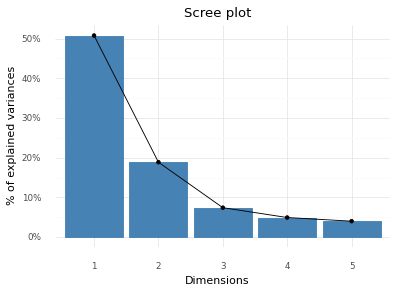

In [4]:
from scientisttools import fviz_screeplot
p = fviz_screeplot(res_pca)
print(p)

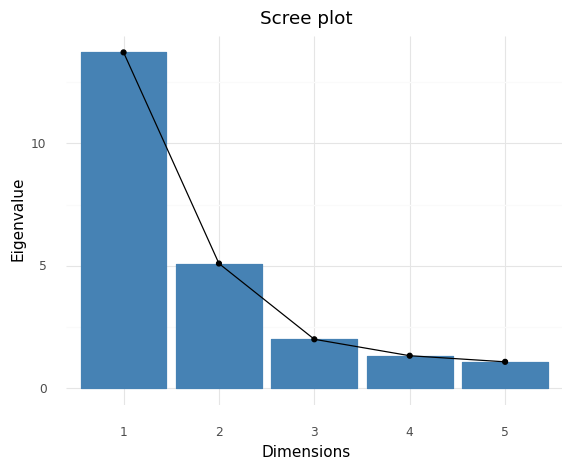

In [5]:
p = fviz_screeplot(res_pca,choice="eigenvalue")
print(p)

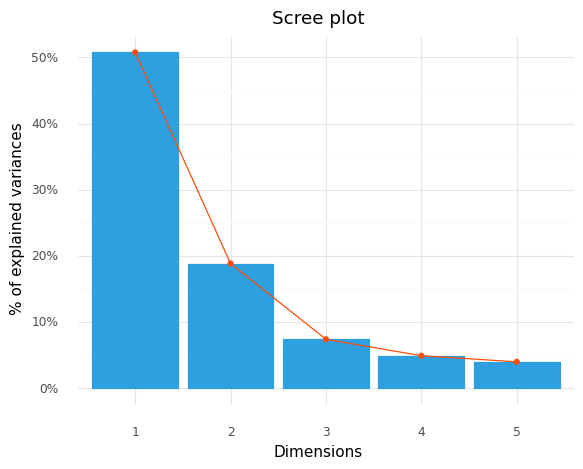

In [6]:
p = fviz_screeplot(res_pca,line_color = "#FC4E07",bar_color = "#2E9FDF", bar_fill = "#2E9FDF")
print(p)

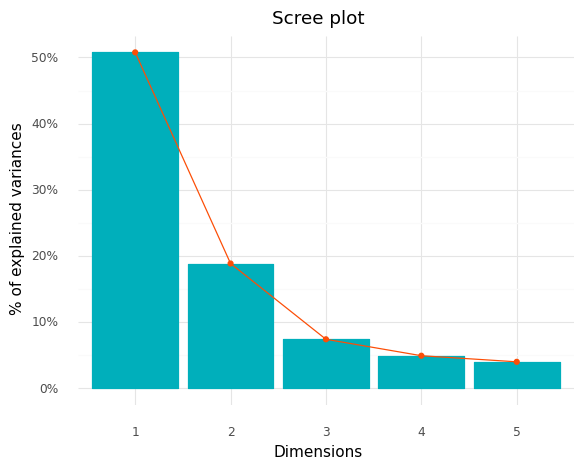

In [7]:
p = fviz_screeplot(res_pca,line_color = "#FC4E07",bar_color = "#00AFBB", bar_fill = "#00AFBB")
print(p)

## Individuals plots

### Color by RGB colors

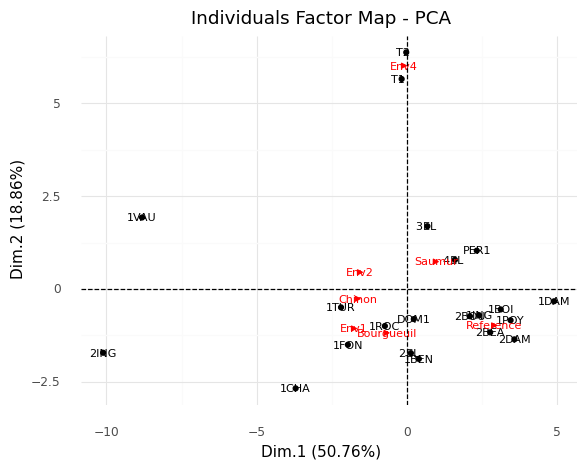

In [8]:
from scientisttools import fviz_pca_ind
p = fviz_pca_ind(res_pca,repel=False)
print(p)

### Color by cos2

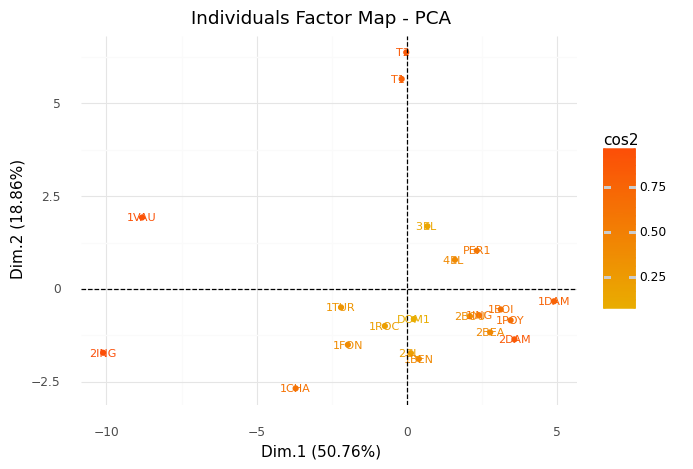

In [9]:
# Color by Cos2
p = fviz_pca_ind(res_pca,color="cos2",quali_sup=False)
print(p)

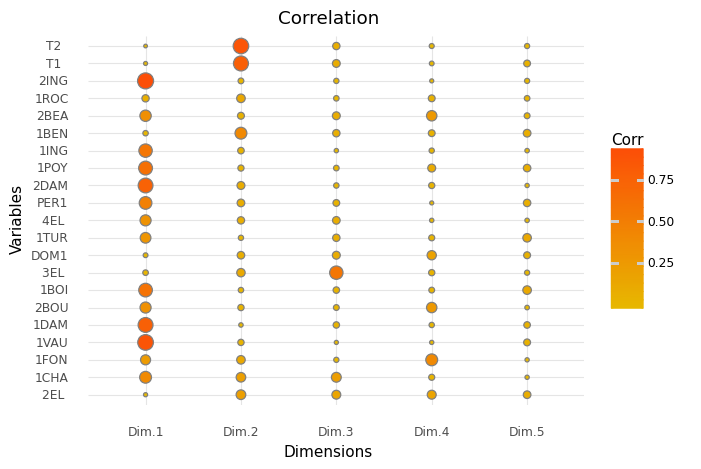

In [10]:
from scientisttools import fviz_corrplot
p = fviz_corrplot(res_pca.ind_["cos2"],colors=["#00AFBB", "#E7B800", "#FC4E07"])
print(p)

### Color by contrib

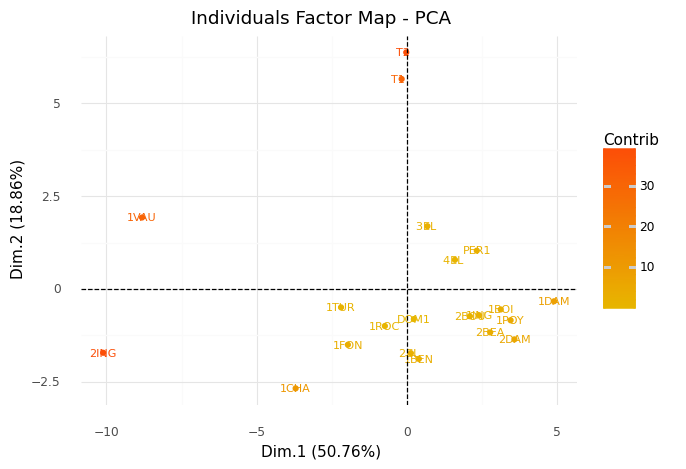

In [11]:
# Color by Cos2
p = fviz_pca_ind(res_pca,color="contrib",quali_sup=False)
print(p)

### Color by continuous variables

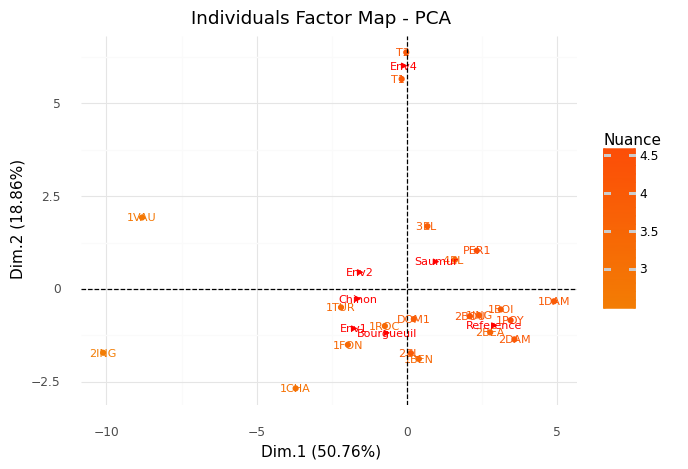

In [12]:
p = fviz_pca_ind(res_pca,color="Nuance")
print(p)

# Color by numpy array

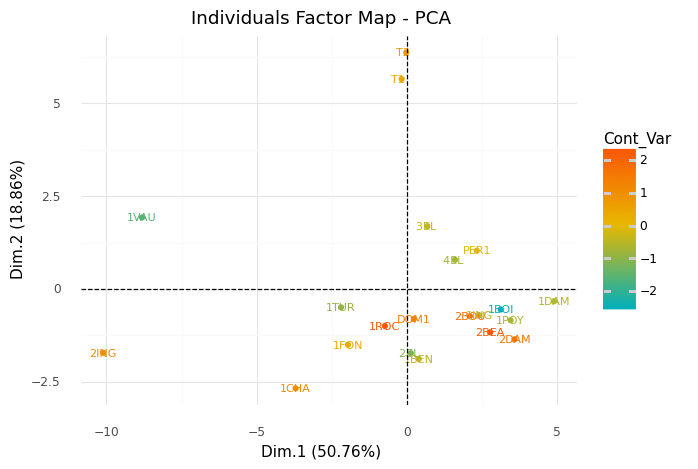

In [13]:
# Using  numpy color
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_pca.ind_["coord"].shape[0])
p = fviz_pca_ind(res_pca,color=color_numpy,quali_sup=False)
print(p)

### Color by kmeans

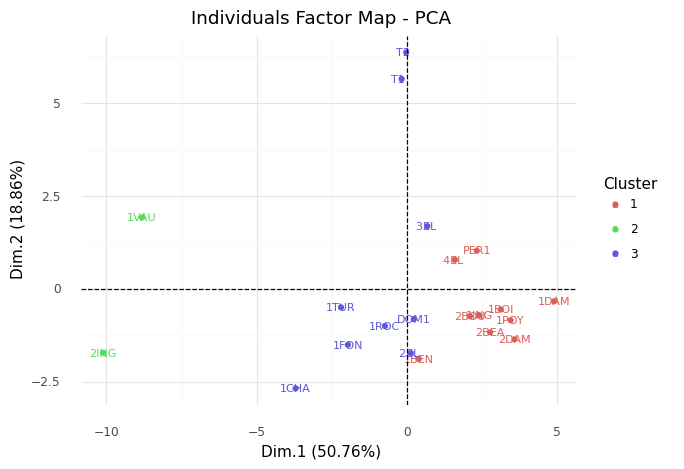

In [14]:
# Using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_pca.ind_["coord"])
p = fviz_pca_ind(res_pca,color=kmeans,repel=False,quali_sup=False)
print(p)

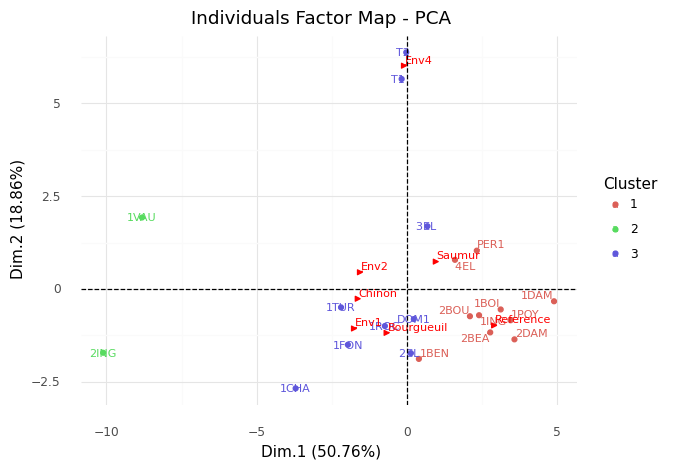

In [15]:
p = fviz_pca_ind(res_pca,color=kmeans,repel=True,quali_sup=True,add_ellipses=True)
print(p)

### Color by qualitatives variables

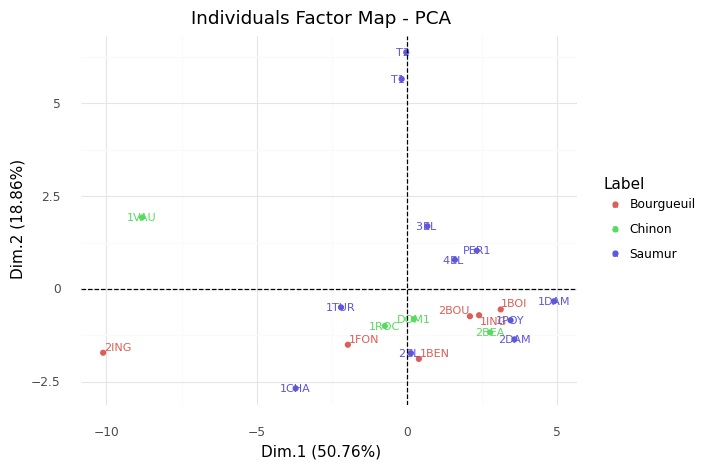

In [16]:
p = fviz_pca_ind(res_pca,quali_sup=False,habillage="Label",repel=True,add_ellipses=False)
print(p)

### Set limits

#### lim Cos2

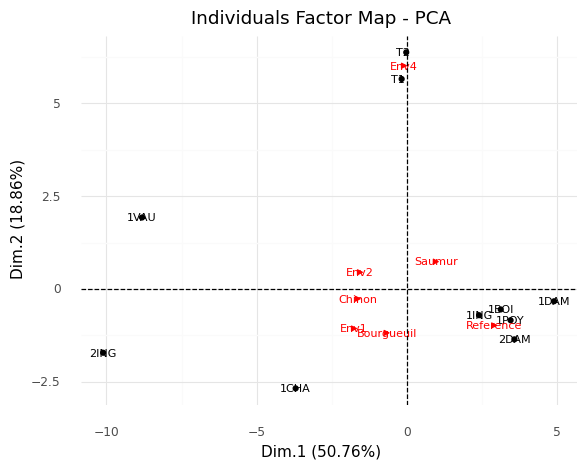

In [17]:
p = fviz_pca_ind(res_pca,repel=False,lim_cos2=0.6)
print(p)

#### lim contrib

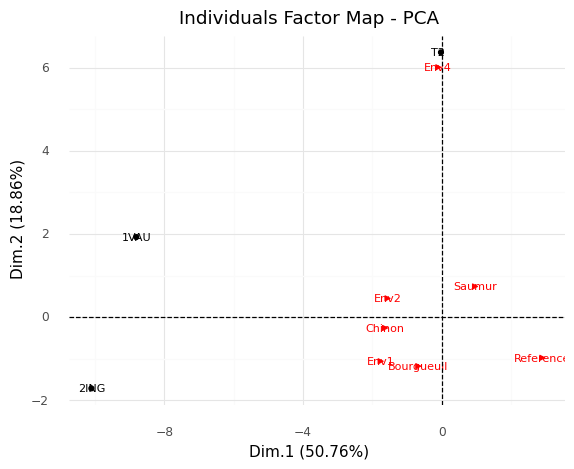

In [18]:
p = fviz_pca_ind(res_pca,repel=False,lim_contrib=30)
print(p)

## Variables

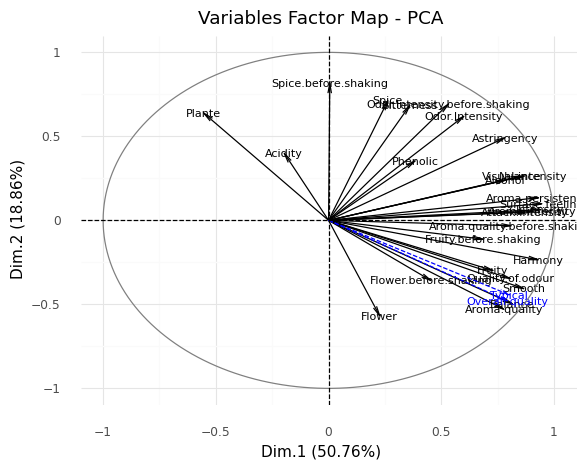

In [19]:
from scientisttools import fviz_pca_var
p = fviz_pca_var(res_pca)
print(p)

## Color by cos2

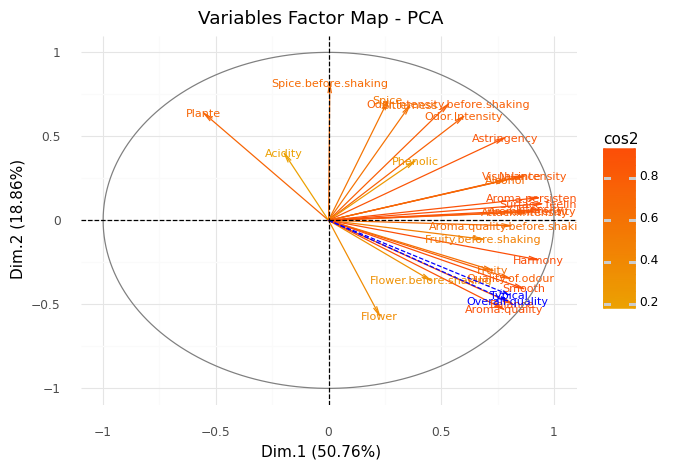

In [20]:
p = fviz_pca_var(res_pca,color="cos2")
print(p)

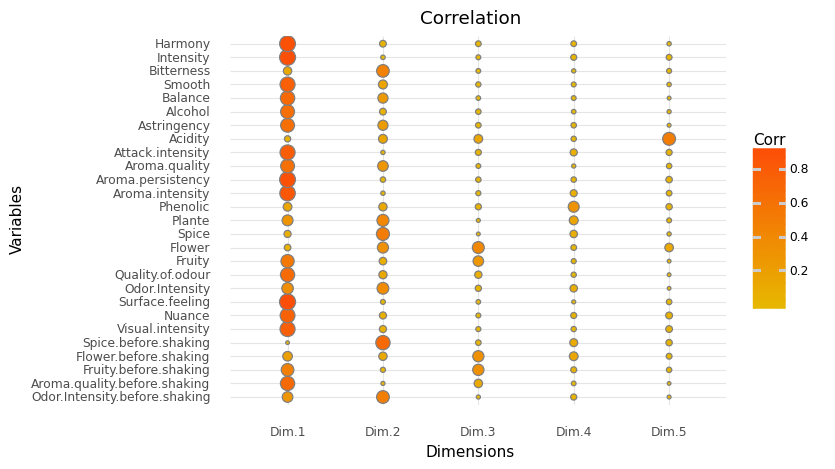

In [21]:
p = fviz_corrplot(res_pca.var_["cos2"],colors=["#00AFBB", "#E7B800", "#FC4E07"])
print(p)

### Color by contrib

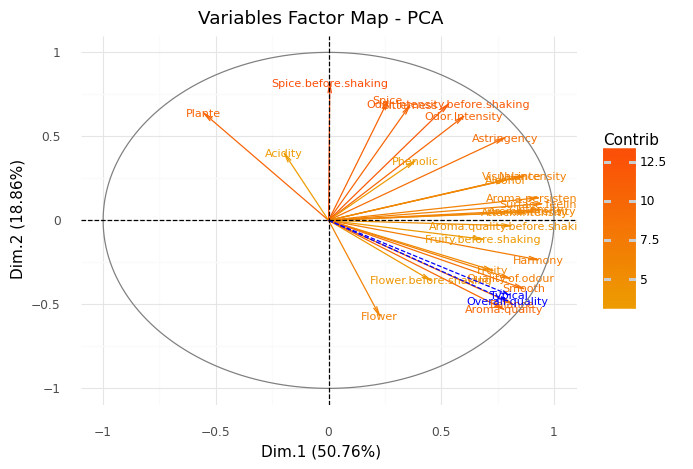

In [22]:
p = fviz_pca_var(res_pca,color="contrib")
print(p)

#### Color by numpy array

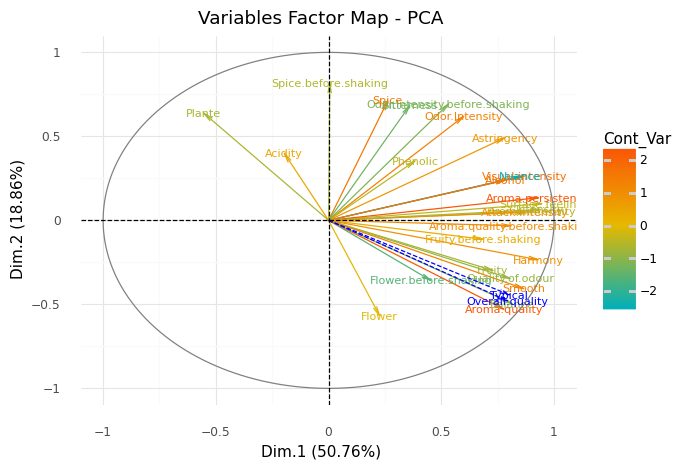

In [23]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_pca.call_["X"].shape[1])
p = fviz_pca_var(res_pca,color=color_numpy)
print(p) 

### Colobr by kmeans

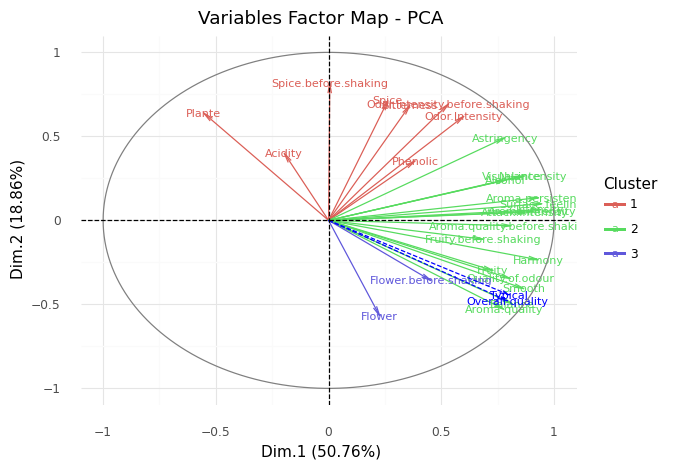

In [24]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_pca.var_["coord"])
p = fviz_pca_var(res_pca,color=kmeans)
print(p)

### Set limits

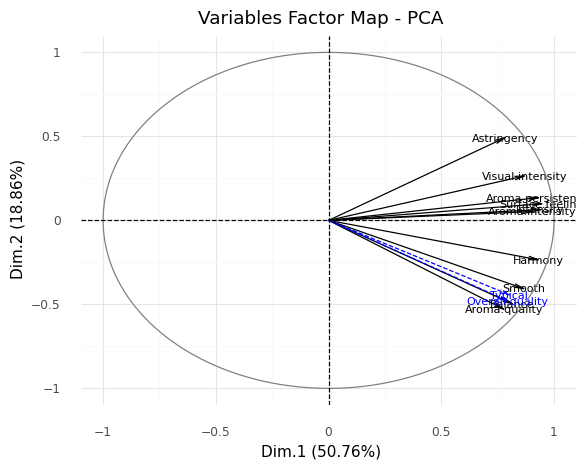

In [25]:
p = fviz_pca_var(res_pca,lim_cos2=0.8)
print(p) 

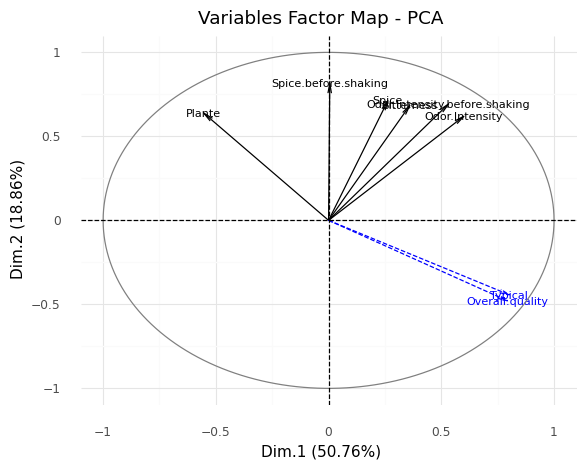

In [26]:
p = fviz_pca_var(res_pca,lim_contrib=10)
print(p) 

## fviz_contrib

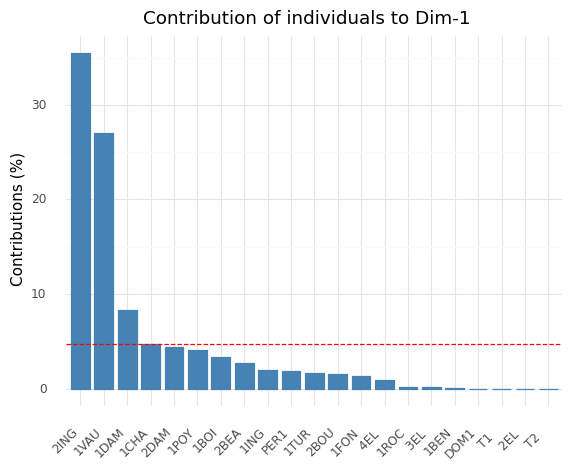

In [27]:
from scientisttools import fviz_contrib
p = fviz_contrib(res_pca,choice="ind")
print(p)

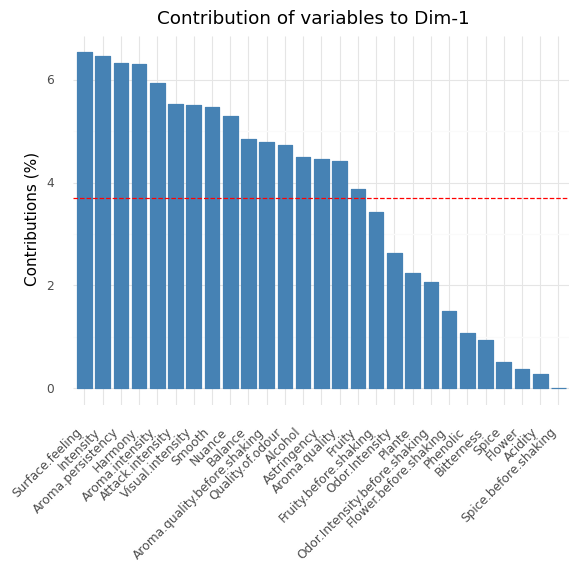

In [28]:
p = fviz_contrib(res_pca,choice="var")
print(p)

## Plot cos2

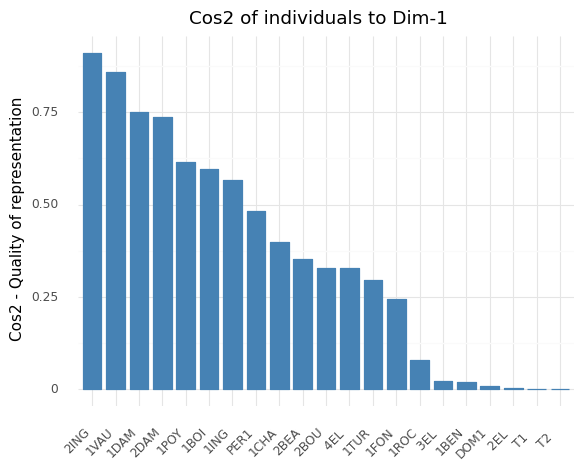

In [29]:
from scientisttools import fviz_cos2
p = fviz_cos2(res_pca)
print(p)

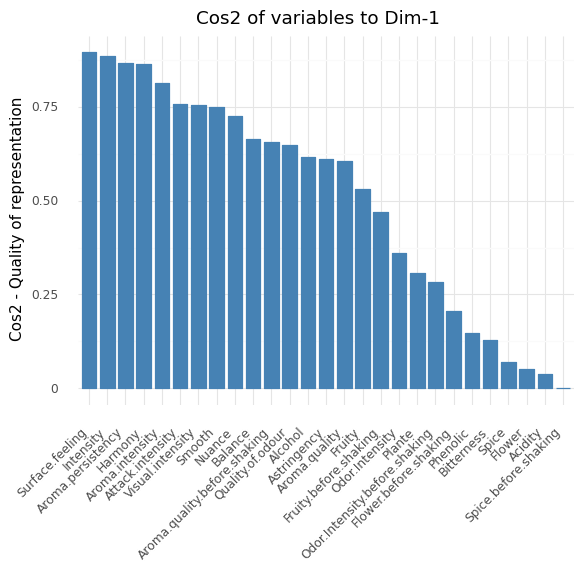

In [30]:
p = fviz_cos2(res_pca,choice="var")
print(p)

## Corrcircle

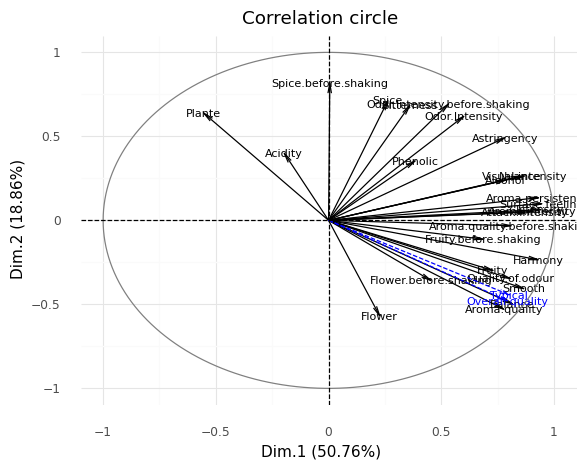

In [31]:
from scientisttools import fviz_corrcircle
p = fviz_corrcircle(res_pca)
print(p)

## biplot

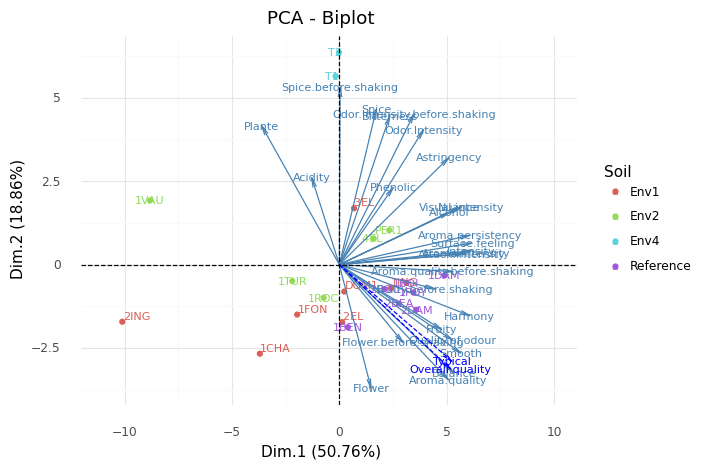

In [32]:
from scientisttools import fviz_pca_biplot
p = fviz_pca_biplot(res_pca,habillage="Soil",add_ellipses=False,x_lim=(-11,10))
print(p)